
# Analyse Exploratoire des Données sur le Dataset Titanic

Ce notebook guide les étudiants à travers une analyse exploratoire des données du célèbre dataset Titanic. L'objectif est d'explorer les données,
de comprendre les relations entre les variables et d'identifier les facteurs influençant la survie des passagers.

## Objectifs :
- Comprendre la structure du dataset.
- Nettoyer les données et gérer les valeurs manquantes.
- Effectuer des analyses univariées, bivariées et multivariées.
- Extraire des insights intéressants et poser de nouvelles questions.

Téléchargez le dataset depuis [Kaggle](https://www.kaggle.com/c/titanic/data) et placez-le dans le répertoire approprié avant de commencer.


In [5]:

# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des graphiques
plt.style.use('ggplot')


In [6]:

# Charger le jeu de données Titanic
df = pd.read_csv('train.csv')  # Assurez-vous que le fichier est dans le bon répertoire

# Afficher les 5 premières lignes du dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



## Aperçu des Données

Examinez la structure du dataset : combien de lignes et de colonnes contient-il ? Quels types de données sont présents ? Utilisez ces informations
pour identifier les variables numériques et catégoriques, ainsi que celles qui nécessitent un nettoyage.


In [7]:

# Dimensions du dataset
df.shape
# Types de données et aperçu des colonnes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Dimensions du dataset**
Le jeu de données Titanic (train) contient 891 lignes (individus) et 12 colonnes (variables). Chaque ligne représente un passager à bord du Titanic, et chaque colonne représente une caractéristique spécifique liée à ces passagers
**Types de données et aperçu des colonnes**
***Variables quantitatives continues*** : Age, Fare (car ce sont des nombres avec des décimales).
***Variables quantitatives discrètes*** : PassengerId, Survived, Pclass, SibSp, Parch.
***Variables qualitatives nominales*** : Name, Sex, Ticket, Cabin, Embarked.
***Variables qualitatives ordinales (avec un ordre)*** : Pclass peut être vue ainsi, même si elle est numérisée en entiers.
***Remarques***: Nous avons remarquer que nous avons des variables males définies (des variables qualitatives considérées quantitatives dans le jeux de données comme survived et pclass).
**Valeurs manquantes** :
    **La colonne Age** a 714 valeurs non nulles sur 891, donc 177 valeurs manquantes.
    **La colonne Cabin** a 204 valeurs non nulles, ce qui signifie qu'il y a un nombre significatif de valeurs manquantes (687 valeurs manquantes).
    **La colonne Embarked** a 889 valeurs non nulles, ce qui indique 2 valeurs manquantes.
Cela indique que certaines colonnes nécessitent un nettoyage, notamment Age, Cabin, et Embarked, avant de poursuivre avec l'analyse.

In [8]:
# Nous allons créer d'autres variables pour corriger les varibles males définies
# Créer une nouvelle colonne 'survie' en remplaçant 0 par "Non" et 1 par "Oui"
df['survie'] = df['Survived'].map({0: 'Non', 1: 'Oui'})

# Créer une nouvelle colonne 'classe_du_passager' en remplaçant les valeurs de Pclass
df['classe_du_passager'] = df['Pclass'].map({1: '1er_classe', 2: '2e_classe', 3: '3e_classe'})

# Afficher les premières lignes pour vérifier
df[['Survived', 'survie', 'Pclass', 'classe_du_passager']].head()


,Survived,survie,Pclass,classe_du_passager
0,0,Non,3,3e_classe
1,1,Oui,1,1er_classe
2,1,Oui,3,3e_classe
3,1,Oui,1,1er_classe
4,0,Non,3,3e_classe


Ce tableau montre les 5 premières lignes de nos variables recodées.

## Analyse Univariée

Analysez la distribution des variables individuellement. Cela permet d'identifier des schémas ou anomalies.
Utilisez des histogrammes pour les variables numériques et des countplots pour les variables catégoriques.


## La variable classe_du_passager:

                    Effectif  Fréquence (%)  ECC  FCC (%)
classe_du_passager                                       
1er_classe               216          24.24  216    24.24
2e_classe                184          20.65  400    44.89
3e_classe                491          55.11  891   100.00


C:\Users\samba\AppData\Local\Temp\ipykernel_3516\2815986586.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=effectifs.index, y=(frequences.values * 100).round(2), palette='Blues_d')


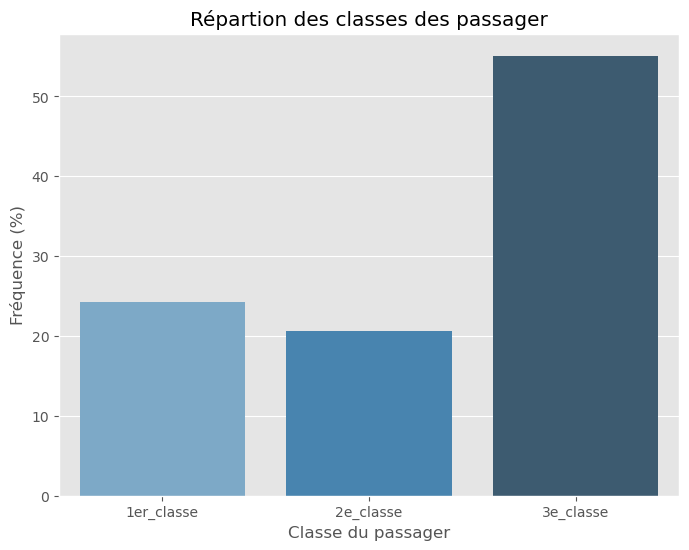

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul des effectifs
effectifs = df['classe_du_passager'].value_counts().sort_index()

# Calcul des fréquences
frequences = effectifs / effectifs.sum()

# Calcul des effectifs cumulés croissants
effectifs_cumules = effectifs.cumsum()

# Calcul des fréquences cumulées croissantes
frequences_cumulees = frequences.cumsum()

# Créer un tableau avec les informations demandées et arrondir à 2 chiffres après la virgule
tableau_classe_du_passager = pd.DataFrame({
    'Effectif': effectifs,
    'Fréquence (%)': (frequences * 100).round(2),
    'ECC': effectifs_cumules,
    'FCC (%)': (frequences_cumulees * 100).round(2)
})

# Afficher le tableau
print(tableau_classe_du_passager)

# Tracer un diagramme des fréquences en pourcentage avec seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=effectifs.index, y=(frequences.values * 100).round(2), palette='Blues_d')
plt.title("Répartion des classes des passager")
plt.xlabel("Classe du passager")
plt.ylabel("Fréquence (%)")
plt.show()


**NB** : La variable classe_du_passager est une ***variable qualitative ordinale***, c'est pourquoi nous avons ordonné les classes des passagers et ajouté les effectifs cumulés croissants et les fréquences cumulées croissantes.
Plus de la moitié des passager ont pris la troisième classe (55,11%), soit 491 passagers
400 passagers ont pris les deux premières classes (1er_classe et 2e_classe) soit 44,89% des passager

## La variable survie:

        Effectif  Fréquence (%)
survie                         
Non        549.0          61.62
Oui        342.0          38.38
Total      891.0         100.00


C:\Users\samba\AppData\Local\Temp\ipykernel_3516\3675661797.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=effectifs_survie.index, y=frequences_survie.values, palette='Blues_d')


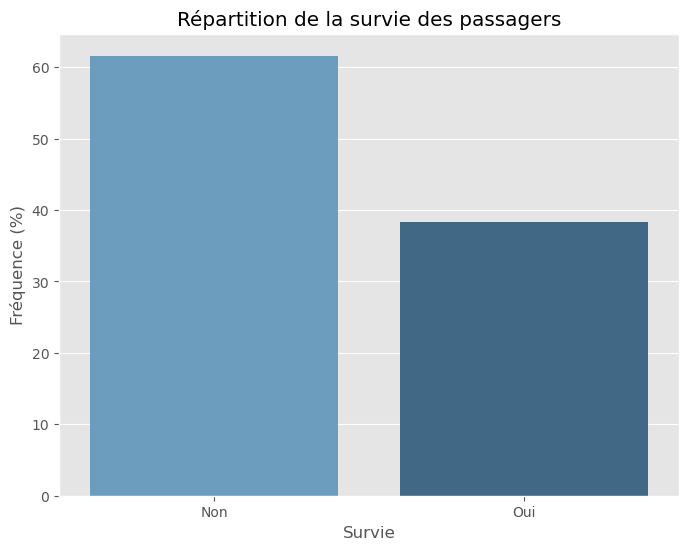

In [10]:

# Calcul des effectifs pour la variable 'survie', triés par ordre décroissant
effectifs_survie = df['survie'].value_counts().sort_values(ascending=False)

# Calcul des fréquences en pourcentage
frequences_survie = (effectifs_survie / effectifs_survie.sum()) * 100

# Créer un tableau avec les informations demandées
tableau_survie = pd.DataFrame({
    'Effectif': effectifs_survie,
    'Fréquence (%)': frequences_survie.round(2)
})

# Ajouter une ligne 'Total' dans le tableau
tableau_survie.loc['Total'] = [effectifs_survie.sum(), frequences_survie.sum().round(2)]

# Afficher le tableau
print(tableau_survie)

# Tracer un diagramme des fréquences en pourcentage avec Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=effectifs_survie.index, y=frequences_survie.values, palette='Blues_d')
plt.title("Répartition de la survie des passagers")
plt.xlabel("Survie")
plt.ylabel("Fréquence (%)")
plt.xticks(rotation=0)
plt.show()



**NB** : Nous avons une variable qualitative nominale, c'est pourquoi nous n'avons pas ordonné les modalités de la variable sur le graphique, et nous n'avons pas ajouté les ECC (Effectifs Cumulés Croissants) et FCC (Fréquences Cumulées Croissantes).
Sur les 891 passagers du Titanic (dans notre jeu de données d'entraînement), seulement 342 ont survécu au naufrage, soit 38,38 % des passagers, tandis que 61,62 % n'ont pas survécu, soit 549 personnes décédées.

## La variable Sexe:

        Effectif  Fréquence (%)
Sex                            
male       577.0          64.76
female     314.0          35.24
Total      891.0         100.00


C:\Users\samba\AppData\Local\Temp\ipykernel_3516\1446664846.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=effectifs_sex.index, y=frequences_sex.values, palette='Blues_d')


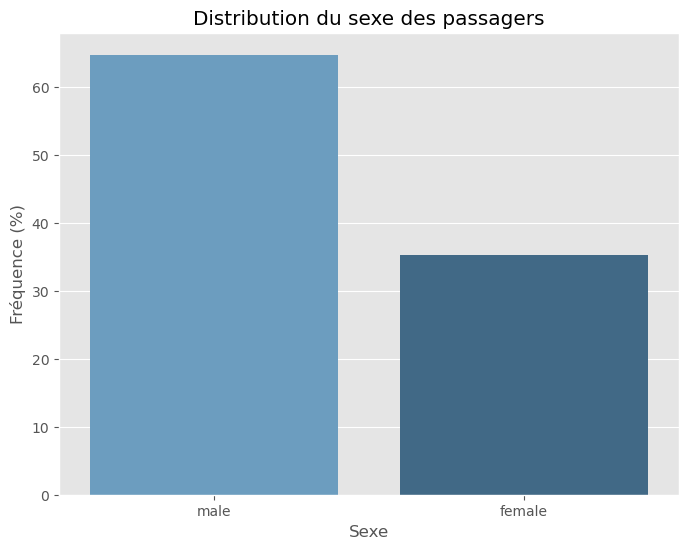

In [11]:

# Calcul des effectifs pour la variable 'Sex', triés par ordre décroissant
effectifs_sex = df['Sex'].value_counts().sort_values(ascending=False)

# Calcul des fréquences en pourcentage
frequences_sex = (effectifs_sex / effectifs_sex.sum()) * 100

# Créer un tableau avec les informations demandées
tableau_sex = pd.DataFrame({
    'Effectif': effectifs_sex,
    'Fréquence (%)': frequences_sex.round(2)
})

# Ajouter une ligne 'Total' dans le tableau
tableau_sex.loc['Total'] = [effectifs_sex.sum(), frequences_sex.sum().round(2)]

# Afficher le tableau
print(tableau_sex)

# Tracer un diagramme des fréquences en pourcentage avec Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=effectifs_sex.index, y=frequences_sex.values, palette='Blues_d')
plt.title("Distribution du sexe des passagers")
plt.xlabel("Sexe")
plt.ylabel("Fréquence (%)")
plt.xticks(rotation=0)
plt.show()


Dans nos données, nous avons plus d'hommes que de femmes : 577 hommes et 314 femmes, soit respectivement 64,76 % et 35,24 %.

## La variable paport_d_embarquement:
nous allons d'abord créer une nouvelle variable port_d_embarquement à partir de la varible Embarked : Port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton) 

                     Effectif  Fréquence (%)
port_d_embarquement                         
Southampton             644.0          72.28
Cherbourg               168.0          18.86
Queenstown               77.0           8.64
NA                        2.0           0.22
Total                   891.0         100.00


C:\Users\samba\AppData\Local\Temp\ipykernel_3516\3509885734.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=effectifs_embarquement_non_null.index, y=frequences_embarquement_non_null.values, palette='Blues_d')


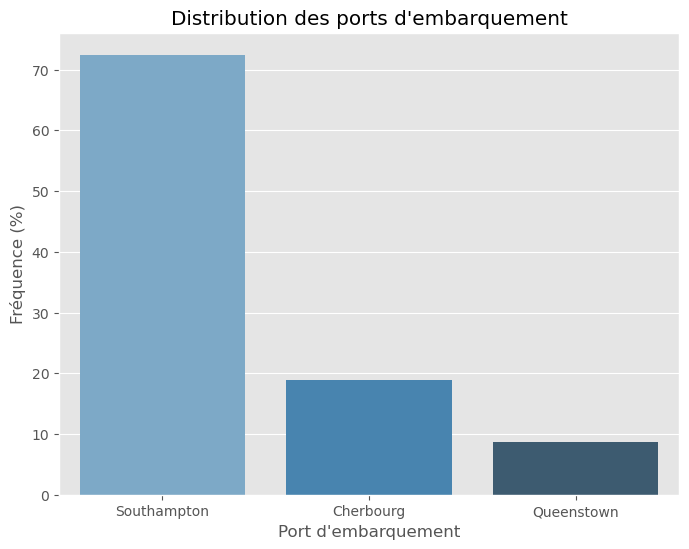

In [12]:

# Créer une nouvelle variable 'port_d_embarquement' en fonction de la variable 'Embarked'
df['port_d_embarquement'] = df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

# Inclure les valeurs manquantes (NA)
df['port_d_embarquement'] = df['port_d_embarquement'].fillna('NA')

# Calcul des effectifs pour la variable 'port_d_embarquement', triés par ordre décroissant
effectifs_embarquement = df['port_d_embarquement'].value_counts().sort_values(ascending=False)

# Calcul des fréquences en pourcentage
frequences_embarquement = (effectifs_embarquement / effectifs_embarquement.sum()) * 100

# Créer un tableau avec les informations demandées
tableau_embarquement = pd.DataFrame({
    'Effectif': effectifs_embarquement,
    'Fréquence (%)': frequences_embarquement.round(2)
})

# Ajouter une ligne 'Total' dans le tableau
tableau_embarquement.loc['Total'] = [effectifs_embarquement.sum(), frequences_embarquement.sum().round(2)]

# Afficher le tableau
print(tableau_embarquement)

# Filtrer les données pour exclure 'NA' (valeurs manquantes) du graphique
df_non_null = df[df['port_d_embarquement'] != 'NA']

# Calcul des effectifs et fréquences sans NA
effectifs_embarquement_non_null = df_non_null['port_d_embarquement'].value_counts().sort_values(ascending=False)
frequences_embarquement_non_null = (effectifs_embarquement_non_null / effectifs_embarquement_non_null.sum()) * 100

# Tracer un diagramme des fréquences en pourcentage avec Seaborn sans les valeurs manquantes
plt.figure(figsize=(8, 6))
sns.barplot(x=effectifs_embarquement_non_null.index, y=frequences_embarquement_non_null.values, palette='Blues_d')
plt.title("Distribution des ports d'embarquement")
plt.xlabel("Port d'embarquement")
plt.ylabel("Fréquence (%)")
plt.xticks(rotation=0)
plt.show()



Dans notre jeu de données, la plupart des passagers sont montés à bord au port de Southampton, soit 72,44 % des passagers (644 passagers). Seulement 8,66 % des passagers (77 passagers) sont montés au port de Queenstown. Enfin, nous avons deux passagers dont le port d'embarquement n'est pas renseigné.

## La variable Fare (Prix des billets):

  Statistique      Valeur
0         Min    0.000000
1          Q1    7.910400
2     Médiane   14.454200
3          Q3   31.000000
4         Max  512.329200
5     Moyenne   32.204208


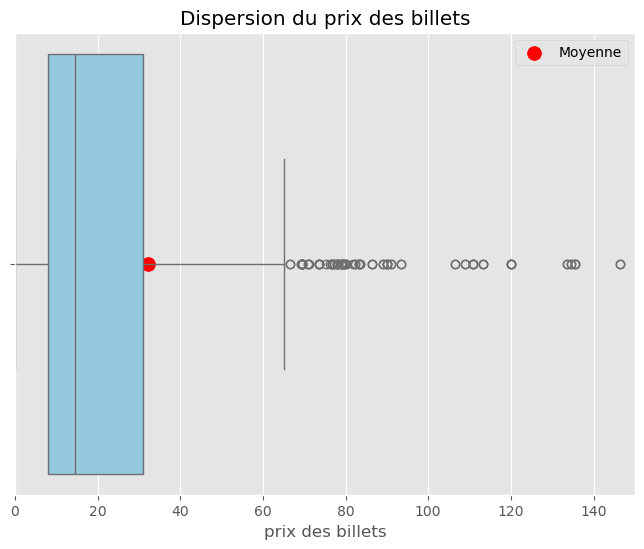

In [13]:

# Calcul des résumés statistiques pour la variable 'Fare'
resume_statistique_fare = df['Fare'].describe(percentiles=[0.25, 0.5, 0.75])

# Extraire les valeurs spécifiques
min_fare = resume_statistique_fare['min']
q1_fare = resume_statistique_fare['25%']
median_fare = resume_statistique_fare['50%']
q3_fare = resume_statistique_fare['75%']
max_fare = resume_statistique_fare['max']
mean_fare = resume_statistique_fare['mean']

# Créer un tableau avec les informations demandées
tableau_statistiques_fare = pd.DataFrame({
    'Statistique': ['Min', 'Q1', 'Médiane', 'Q3', 'Max', 'Moyenne'],
    'Valeur': [min_fare, q1_fare, median_fare, q3_fare, max_fare, mean_fare]
})

# Afficher le tableau
print(tableau_statistiques_fare)

# Créer le boxplot horizontal avec la moyenne indiquée par un point rouge
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fare'], color="skyblue")

# Ajouter un point rouge pour la moyenne
plt.scatter(x=mean_fare, y=0, color='red', s=100, label='Moyenne')

# Zoomer sur la plage des valeurs jusqu'à 100 pour mieux visualiser la majorité des données
plt.xlim(0, 150)

# Titre et légende
plt.title('Dispersion du prix des billets')
plt.xlabel('prix des billets')
plt.legend()

# Afficher le graphique
plt.show()





**Résumé statistique**
Le tarif minimum payé par les passagers est de 0.00, ce qui signifie que certains passagers ont voyagé gratuitement. Le premier quartile (Q1 = 7.91) montre que 25 % des passagers ont payé un tarif inférieur ou égal à 7,91, ce qui reflète des tarifs très bas, probablement associés à des passagers de troisième classe. La médiane, qui est de 14.45, indique que la moitié des passagers ont payé un tarif inférieur ou égal à cette valeur, confirmant que la plupart des billets étaient abordables.
Le troisième quartile (Q3 = 31.00) montre que 75 % des passagers ont payé un tarif inférieur ou égal à 31, ce qui représente un tarif modérément élevé pour une partie des passagers. En revanche, le tarif maximum payé (512.33) est extrêmement élevé, probablement pour des passagers de première classe ou pour des cabines de luxe. Enfin, la moyenne du tarif est de 32.20, ce qui est légèrement supérieur à la médiane. Cela suggère une répartition des tarifs légèrement biaisée vers la droite, avec quelques passagers ayant payé des tarifs très élevés.

**Boxplot**
Le boxplot révèle une forte concentration des tarifs autour de valeurs faibles, avec la majorité des données comprises entre 0 et 40. Le point rouge, représentant la moyenne (32.20), se situe légèrement au-dessus de la médiane (14.45), ce qui confirme une distribution asymétrique. Les valeurs plus élevées influencent la moyenne, la tirant vers le haut.
Les valeurs aberrantes visibles à droite du graphique montrent que certains passagers ont payé des tarifs beaucoup plus élevés, atteignant jusqu'à 512.33, probablement pour des billets de première classe très onéreux. La dispersion importante des tarifs, avec plusieurs points éloignés de la boîte, met en évidence une grande variabilité dans les montants payés par les passagers. Cela souligne la diversité des classes et des services disponibles à bord.

In [14]:

def analyser_variable(df, variable, titre_boxplot="Boxplot de la variable", xlabel="Valeur", ylabel="Variable"):
    """
    Cette fonction calcule les résumés statistiques d'une variable dans un DataFrame et trace un boxplot.

    Arguments:
    df : pd.DataFrame - Le DataFrame contenant les données
    variable : str - Le nom de la variable à analyser
    titre_boxplot : str - Le titre du boxplot (par défaut : "Boxplot de la variable")
    xlabel : str - L'étiquette de l'axe des x du boxplot (par défaut : "Valeur")
    ylabel : str - L'étiquette de l'axe des y du boxplot (par défaut : "Variable")
    """

    # Calcul des résumés statistiques pour la variable sélectionnée
    resume_statistique = df[variable].describe(percentiles=[0.25, 0.5, 0.75])

    # Extraire les valeurs spécifiques
    min_value = resume_statistique['min']
    q1_value = resume_statistique['25%']
    median_value = resume_statistique['50%']
    q3_value = resume_statistique['75%']
    max_value = resume_statistique['max']
    mean_value = resume_statistique['mean']

    # Créer un tableau avec les informations demandées
    tableau_statistiques = pd.DataFrame({
        'Statistique': ['Min', 'Q1', 'Médiane', 'Q3', 'Max', 'Moyenne'],
        'Valeur': [min_value, q1_value, median_value, q3_value, max_value, mean_value]
    })

    # Afficher le tableau
    print("Résumé statistique pour la variable :", variable)
    print(tableau_statistiques)

    # Créer le boxplot avec la moyenne indiquée par un point rouge
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[variable], color="skyblue")

    # Ajouter un point rouge pour la moyenne
    plt.scatter(x=mean_value, y=0, color='red', s=100, label='Moyenne')

    # Titre et légendes
    plt.title(titre_boxplot)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

    # Afficher le boxplot
    plt.show()



Résumé statistique pour la variable : Fare
  Statistique      Valeur
0         Min    0.000000
1          Q1    7.910400
2     Médiane   14.454200
3          Q3   31.000000
4         Max  512.329200
5     Moyenne   32.204208


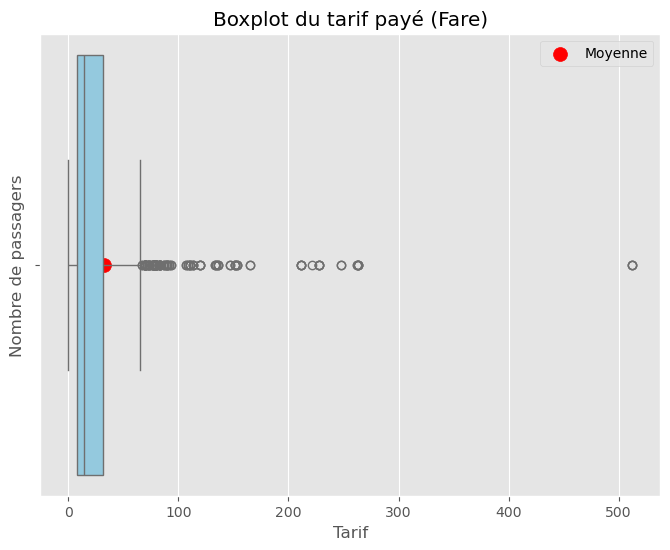

In [15]:
# Exemple d'utilisation
analyser_variable(df, 'Fare', titre_boxplot="Boxplot du tarif payé (Fare)", xlabel="Tarif", ylabel="Nombre de passagers")


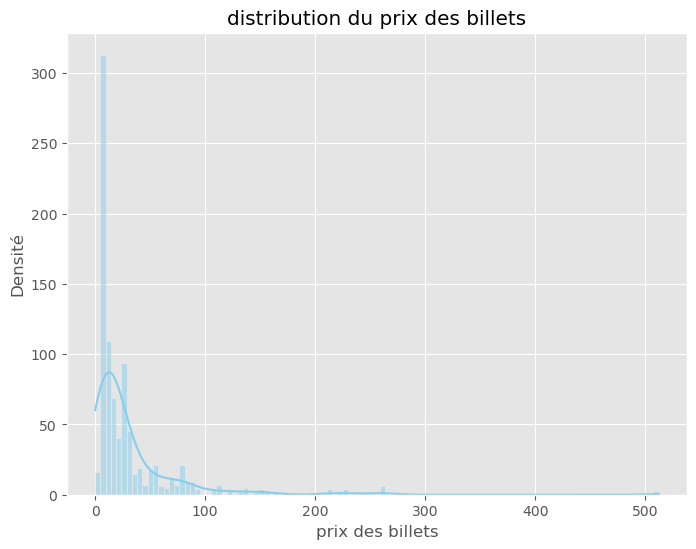

In [16]:

# Créer un histogramme avec une courbe de distribution (kde) pour la variable 'Fare'
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], kde=True, color='skyblue')

# Titre et étiquettes
plt.title('distribution du prix des billets')
plt.xlabel('prix des billets')
plt.ylabel('Densité')

# Afficher le graphique
plt.show()



Ce graphe montre l'histogramme des tarifs payés pour les billets (Fare) ainsi que la courbe de distribution. La distribution des tarifs est très asymétrique à gauche, ce qui signifie que la majorité des passagers ont payé des tarifs relativement bas, tandis qu'une minorité a payé des tarifs beaucoup plus élevés.


## Nettoyage des Données

Avant d'effectuer des analyses, il est crucial de nettoyer les données :
- Identifier et traiter les valeurs manquantes.
- Gérer les doublons s'il y en a.
- Effectuer des transformations de données si nécessaire.



## Analyse Bivariée

Examinez les relations entre deux variables. Cela peut inclure des comparaisons entre les variables catégoriques et numériques
comme la survie selon le sexe, la classe du billet, etc.


### Etude de la survie selon la classe des passagers

L'objectif de cette étude est d'analyser la relation entre la classe des passagers et leurs chances de survie lors du naufrage du Titanic. Elle vise à identifier si les passagers de classes sociales différentes ont eu des probabilités de survie inégales.

Tableau croisé des effectifs de survie par classe :
                      Non survécu  Survécu  Total
Classe des passagers                             
1er_classe                     80      136    216
2e_classe                      97       87    184
3e_classe                     372      119    491
All                           549      342    891

Taux de survie par classe (%) :
                      Non survécu    Survécu  Total
Classe des passagers                               
1er_classe              37.037037  62.962963    216
2e_classe               52.717391  47.282609    184
3e_classe               75.763747  24.236253    491
All                     61.616162  38.383838    891


<Figure size 1000x600 with 0 Axes>

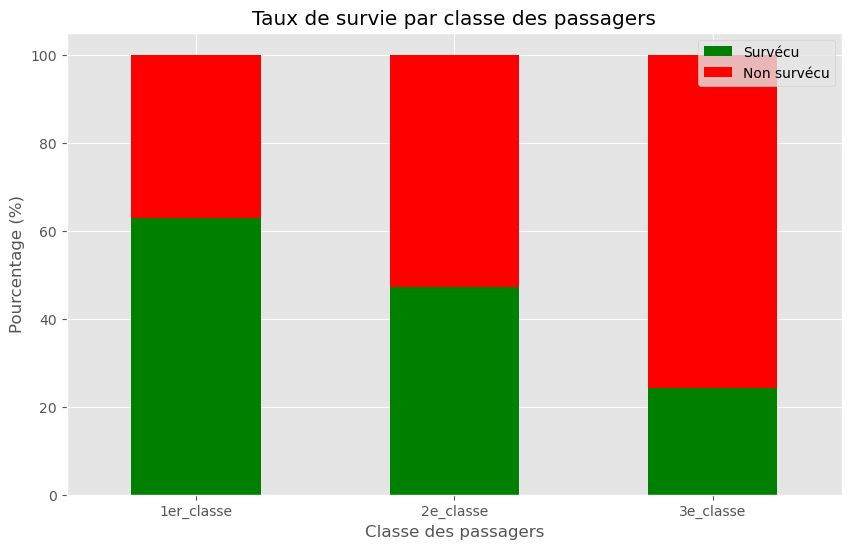

In [17]:

# Etude de la survie selon la classe des passagers

# Créer un tableau croisé des effectifs de survie par classe avec les totaux (margins=True)
tableau_survie_classe = pd.crosstab(df['classe_du_passager'], df['survie'], margins=True)
tableau_survie_classe.columns = ['Non survécu', 'Survécu', 'Total']
tableau_survie_classe.index.name = 'Classe des passagers'

# Calculer les taux de survie par classe avec les totaux (en pourcentage)
taux_survie_classe = tableau_survie_classe.div(tableau_survie_classe['Total'], axis=0) * 100
taux_survie_classe = taux_survie_classe[['Non survécu', 'Survécu']]  # Garder seulement les colonnes d'intérêt
taux_survie_classe['Total'] = tableau_survie_classe['Total']  # Ajouter la colonne Total pour les pourcentages

# Afficher le tableau croisé et les taux de survie avec les totaux
print("Tableau croisé des effectifs de survie par classe :")
print(tableau_survie_classe)

print("\nTaux de survie par classe (%) :")
print(taux_survie_classe)

# Visualiser les taux de survie par classe avec un diagramme en barres empilées
plt.figure(figsize=(10, 6))
taux_survie_classe[['Survécu', 'Non survécu']].iloc[:-1].plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))

# Ajouter les titres et étiquettes
plt.title('Taux de survie par classe des passagers')
plt.xlabel('Classe des passagers')
plt.ylabel('Pourcentage (%)')
plt.xticks(rotation=0)

# Afficher le graphique
plt.show()




**Tableau croisé des effectifs**:
En ce qui concerne les effectifs de survie par classe, on observe que parmi les 216 passagers de 1re classe, 136 (soit 62.96 %) ont survécu, tandis que 80 (soit 37.04 %) n'ont pas survécu. Pour les 184 passagers de 2e classe, 87 (soit 47.28 %) ont survécu et 97 (soit 52.72 %) n'ont pas survécu. Enfin, parmi les 491 passagers de 3e classe, seulement 119 (soit 24.24 %) ont survécu, alors que 372 (soit 75.76 %) n'ont pas survécu.

**Taux de survie par classe** :
Le taux de survie varie nettement en fonction de la classe des passagers. Les passagers de 1re classe ont eu le taux de survie le plus élevé avec 62.96 % de survivants. En 2e classe, un peu moins de la moitié des passagers ont survécu, avec un taux de 47.28 %. En revanche, les passagers de 3e classe ont eu un taux de survie très faible, avec seulement 24.24 % de survivants.


Les résultats suggèrent une corrélation entre la classe sociale et la survie : les passagers de 1re classe avaient une meilleure probabilité de survivre par rapport aux passagers des autres classes, en particulier ceux de 3e classe. Cependant, il est important de noter que cette analyse est purement descriptive et ne permet pas de tirer des conclusions définitives sans un test statistique supplémentaire (comme un test du Chi2 ou un test de régression logistique). Cela permettrait de vérifier si la classe des passagers est réellement un facteur déterminant dans la survie, en tenant compte d'autres variables confondantes.

### Etude de la survie selon le sexe des passagers

L'objectif de cette étude est d'analyser la relation entre le sexe des passagers et leurs chances de survie lors du naufrage du Titanic. Elle vise à déterminer si les hommes et les femmes ont eu des probabilités de survie différentes.

Tableau croisé des effectifs de survie par sexe :
                    Non survécu  Survécu  Total
Sexe des passagers                             
female                       81      233    314
male                        468      109    577
All                         549      342    891

Taux de survie par sexe (%) :
                    Non survécu    Survécu  Total
Sexe des passagers                               
female                25.796178  74.203822    314
male                  81.109185  18.890815    577
All                   61.616162  38.383838    891


<Figure size 1000x600 with 0 Axes>

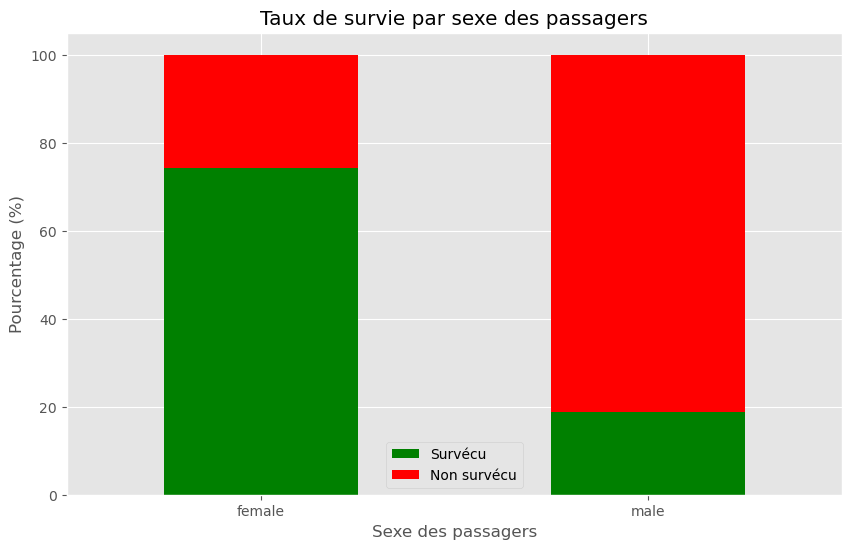

In [18]:

# Créer un tableau croisé des effectifs de survie par sexe avec les totaux (margins=True)
tableau_survie_sexe = pd.crosstab(df['Sex'], df['survie'], margins=True)
tableau_survie_sexe.columns = ['Non survécu', 'Survécu', 'Total']
tableau_survie_sexe.index.name = 'Sexe des passagers'

# Calculer les taux de survie par sexe avec les totaux (en pourcentage)
taux_survie_sexe = tableau_survie_sexe.div(tableau_survie_sexe['Total'], axis=0) * 100
taux_survie_sexe = taux_survie_sexe[['Non survécu', 'Survécu']]  # Garder seulement les colonnes d'intérêt
taux_survie_sexe['Total'] = tableau_survie_sexe['Total']  # Ajouter la colonne Total pour les pourcentages

# Afficher le tableau croisé et les taux de survie avec les totaux
print("Tableau croisé des effectifs de survie par sexe :")
print(tableau_survie_sexe)

print("\nTaux de survie par sexe (%) :")
print(taux_survie_sexe)

# Visualiser les taux de survie par sexe avec un diagramme en barres empilées
plt.figure(figsize=(10, 6))
taux_survie_sexe[['Survécu', 'Non survécu']].iloc[:-1].plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))

# Ajouter les titres et étiquettes
plt.title('Taux de survie par sexe des passagers')
plt.xlabel('Sexe des passagers')
plt.ylabel('Pourcentage (%)')
plt.xticks(rotation=0)

# Afficher le graphique
plt.show()


**Effectifs de survie par sexe** :
Sur 314 femmes à bord, 233 ont survécu, soit 74.20 % de taux de survie, tandis que 81 femmes (soit 25.80 %) n'ont pas survécu.
Parmi les 577 hommes, seulement 109 ont survécu, soit 18.89 % de taux de survie. En revanche, 468 hommes (soit 81.11 %) n'ont pas survécu.
Au total, le taux global de survie est de 38.38 %, avec une grande majorité de 61.62 % de passagers n'ayant pas survécu.

Bien que les résultats montrent que les femmes avaient des chances de survie bien plus élevées que les hommes, il est important de noter que le nombre d'hommes à bord était largement supérieur au nombre de femmes. Cela pourrait influencer les résultats. 

### Fonction pour croisement de deux variables qualitatives

In [27]:


def croisement_qualitatives(df, var1, var2, titre_tableau="Tableau croisé", titre_graphique="Graphique des taux", xlabel="Variable 1", ylabel="Pourcentage (%)", couleurs=['green', 'red']):
    """
    Cette fonction effectue un croisement entre deux variables qualitatives d'un DataFrame, calcule les taux,
    et génère un tableau croisé ainsi qu'un graphique en barres empilées.

    Arguments:
    df : pd.DataFrame - Le DataFrame contenant les données
    var1 : str - La première variable qualitative
    var2 : str - La deuxième variable qualitative
    titre_tableau : str - Le titre du tableau croisé (par défaut : "Tableau croisé")
    titre_graphique : str - Le titre du graphique en barres empilées (par défaut : "Graphique des taux")
    xlabel : str - Le titre de l'axe x (par défaut : "Variable 1")
    ylabel : str - Le titre de l'axe y (par défaut : "Pourcentage (%)")
    couleurs : list - Liste des couleurs pour le graphique (par défaut : ['green', 'red'])
    """

    # Créer un tableau croisé des effectifs entre les deux variables
    tableau_croise = pd.crosstab(df[var1], df[var2], margins=True)
    
    # Calculer les taux en pourcentage
    taux_croise = tableau_croise.div(tableau_croise['All'], axis=0) * 100
    taux_croise = taux_croise.drop(columns=['All'])  # Enlever la colonne 'Total'
    taux_croise['Total'] = tableau_croise['All']  # Ajouter la colonne Total pour garder l'info du total

    # Arrondir les taux à 2 chiffres après la virgule
    taux_croise = taux_croise.round(2)
    
    # Afficher le tableau croisé avec les totaux
    print(f"{titre_tableau} :")
    print(tableau_croise)

    print(f"\nTaux croisé entre {var1} et {var2} (%):")
    print(taux_croise)

    # Exclure la ligne et la colonne 'Total' du graphique
    taux_croise_sans_total = taux_croise.drop(index='All', columns='Total')

    # Visualiser les taux avec un diagramme en barres empilées sans la ligne "Total"
    plt.figure(figsize=(10, 6))
    taux_croise_sans_total.plot(kind='bar', stacked=True, color=couleurs, figsize=(10, 6))
    
    # Ajouter les titres et étiquettes
    plt.title(titre_graphique)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=0)
    
    # Afficher le graphique
    plt.show()



Tableau croisé des effectifs de survie par classe :
survie              Non  Oui  All
classe_du_passager               
1er_classe           80  136  216
2e_classe            97   87  184
3e_classe           372  119  491
All                 549  342  891

Taux croisé entre classe_du_passager et survie (%):
survie                Non    Oui  Total
classe_du_passager                     
1er_classe          37.04  62.96    216
2e_classe           52.72  47.28    184
3e_classe           75.76  24.24    491
All                 61.62  38.38    891


<Figure size 1000x600 with 0 Axes>

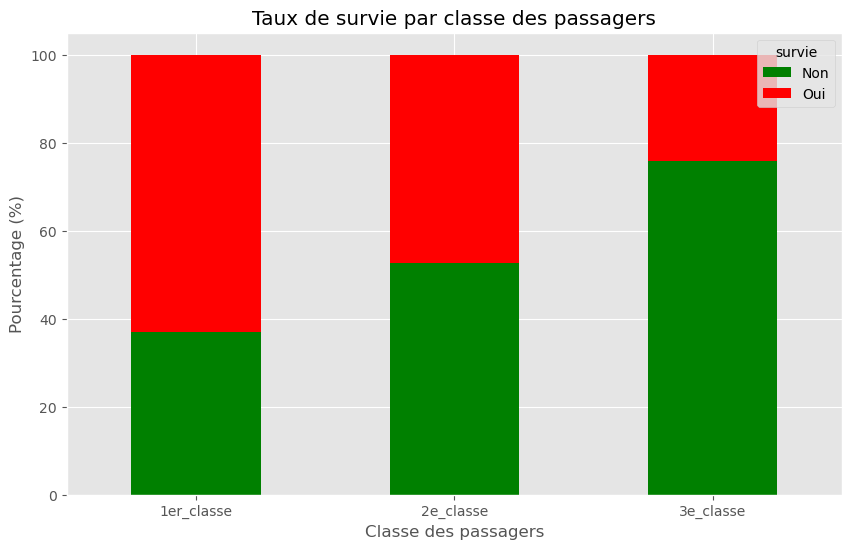

In [28]:
# Croisement entre la classe des passagers et leur survie
croisement_qualitatives(df, 
                        var1='classe_du_passager',  # Variable 1 (classe des passagers)
                        var2='survie',              # Variable 2 (survie)
                        titre_tableau="Tableau croisé des effectifs de survie par classe", 
                        titre_graphique="Taux de survie par classe des passagers", 
                        xlabel="Classe des passagers", 
                        ylabel="Pourcentage (%)")




## Analyse Multivariée

Étudiez les interactions entre plusieurs variables. Utilisez des heatmaps pour explorer les corrélations entre les variables numériques.


Création d'une variable sexe en numérique à partir de la variable Sex pour le Heatmap

In [30]:
# Remplacer 'female' par 1 et 'male' par 0 dans une nouvelle colonne 'sexe'
df['sexe'] = df['Sex'].replace({'female': 1, 'male': 0})

# Convertir la nouvelle colonne 'sexe' en type int64
df['sexe'] = df['sexe'].astype('int64')

# Vérifier que la conversion a bien fonctionné
print(df[['Sex', 'sexe']].head())


      Sex  sexe
0    male     0
1  female     1
2  female     1
3  female     1
4    male     0


C:\Users\samba\AppData\Local\Temp\ipykernel_3516\1966510832.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sexe'] = df['Sex'].replace({'female': 1, 'male': 0})


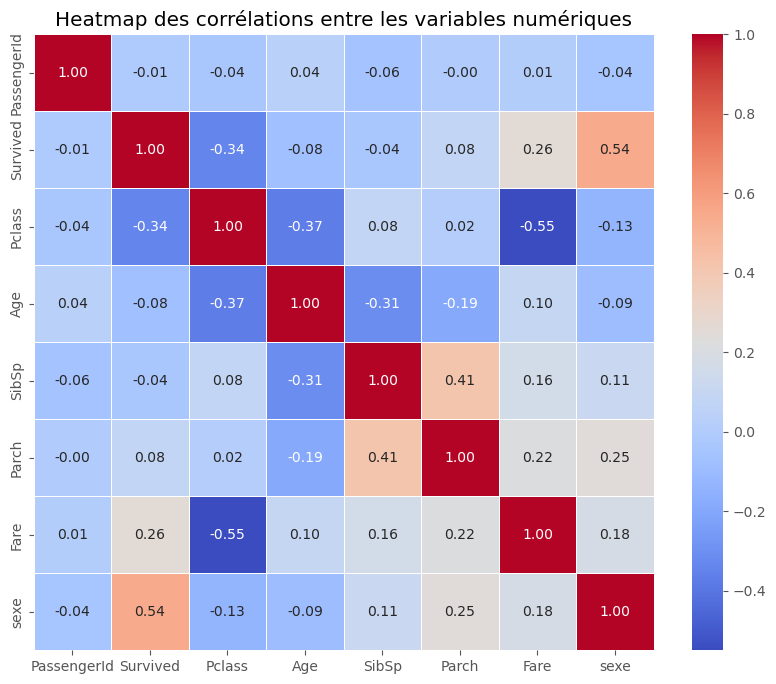

In [31]:

# Heatmap des corrélations entre les variables numériques

# Étape 1: Sélectionner les variables numériques
df_numeriques = df.select_dtypes(include=['float64', 'int64'])

# Étape 2: Calculer la matrice de corrélation
corr_matrix = df_numeriques.corr()

# Étape 3: Visualiser la heatmap des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Ajouter un titre
plt.title('Heatmap des corrélations entre les variables numériques')

# Afficher la heatmap
plt.show()

